In [1]:
import zipfile
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import matplotlib.pyplot as plt

In [2]:
# zipFile = zipfile.ZipFile("", "r")
# zipFile.extractAll()
# zipFile.close()


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tensorflow Projects/Image in pixels/Digit Recognizer/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x = df.drop("label", axis = 1)
y = df["label"]

In [5]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


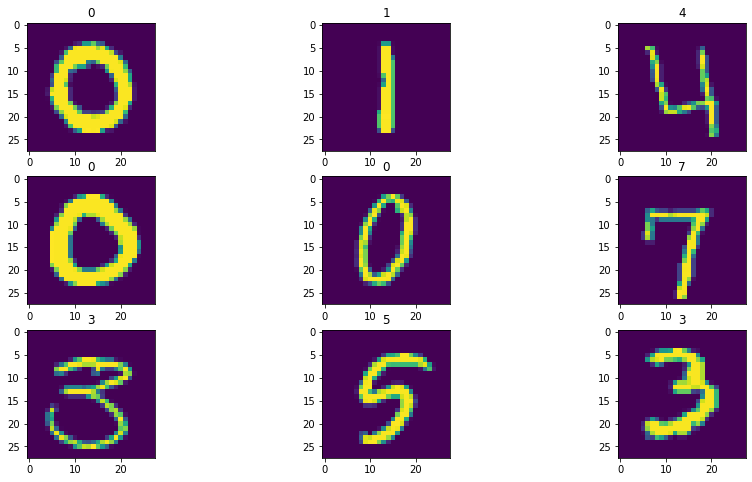

In [6]:
plt.figure(figsize = (15, 8))

for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.imshow(x.iloc[i, :].values.reshape(28, 28))
  plt.title(y[i])

In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state= 143, shuffle = True)

In [9]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((31500, 784), (10500, 784), (31500,), (10500,))

In [10]:
# xtrain.iloc[0, :].values

In [11]:
xtrain = xtrain.values.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.values.reshape(xtest.shape[0], 28, 28, 1)
ytrain = np.array(pd.get_dummies(ytrain))
ytest = np.array(pd.get_dummies(ytest))

In [12]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding= 'same', activation='relu',
                    input_shape = (28,28,1)))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))
    
    return model

model = createModel()
batch_size = 256
epochs = 10
model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics = ['accuracy'])
    

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                        

In [14]:
history = model.fit(xtrain, ytrain, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data=(xtest, ytest))
model.evaluate(xtest, ytest)

Epoch 1/10
124/124 [==============================] - 15s 30ms/step - loss: 1.3144 - accuracy: 0.5461 - val_loss: 0.2064 - val_accuracy: 0.9378
Epoch 2/10
124/124 [==============================] - 3s 25ms/step - loss: 0.2749 - accuracy: 0.9165 - val_loss: 0.0878 - val_accuracy: 0.9732
Epoch 3/10
124/124 [==============================] - 3s 24ms/step - loss: 0.1443 - accuracy: 0.9579 - val_loss: 0.0668 - val_accuracy: 0.9820
Epoch 4/10
124/124 [==============================] - 4s 29ms/step - loss: 0.1054 - accuracy: 0.9703 - val_loss: 0.0532 - val_accuracy: 0.9848
Epoch 5/10
124/124 [==============================] - 3s 25ms/step - loss: 0.0879 - accuracy: 0.9737 - val_loss: 0.0476 - val_accuracy: 0.9858
Epoch 6/10
124/124 [==============================] - 3s 27ms/step - loss: 0.0780 - accuracy: 0.9790 - val_loss: 0.0466 - val_accuracy: 0.9871
Epoch 7/10
124/124 [==============================] - 3s 25ms/step - loss: 0.0659 - accuracy: 0.9808 - val_loss: 0.0382 - val_accuracy: 0.988

[0.03903217241168022, 0.9900952577590942]

In [15]:
predictions = model.predict(xtest)
predictions1 = np.argmax(predictions,axis = 1)


329/329 [==============================] - 1s 2ms/step


In [16]:
predict = pd.Series(predictions1, name="Label")
image_id = pd.Series(np.arange(1,len(predict)+1), name = "ImageId")


In [17]:
output_file = pd.concat([image_id,predict],axis =1)


In [18]:
output_file.head()

,ImageId,Label
0,1,8
1,2,3
2,3,7
3,4,8
4,5,1


In [21]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tensorflow Projects/Image in pixels/Digit Recognizer/test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test = test.values.reshape(test.shape[0], 28, 28, 1)

In [23]:
test_pred = model.predict(test)

875/875 [==============================] - 2s 2ms/step


In [26]:
label = np.argmax(test_pred, axis = 1)

In [27]:
test_label = pd.Series(label, name = "Test_data_label")
output = pd.concat([image_id, test_label], axis = 1)

In [28]:
output.head()

,ImageId,Test_data_label
0,1.0,2
1,2.0,0
2,3.0,9
3,4.0,0
4,5.0,3
